In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [97]:
df = pd.read_csv("/content/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [98]:
df.shape

(344, 7)

In [99]:
print("Distinct Species:",df["species"].unique())
print("Distinct Islands:",df["island"].unique())

Distinct Species: ['Adelie' 'Chinstrap' 'Gentoo']
Distinct Islands: ['Torgersen' 'Biscoe' 'Dream']


In [100]:
print(df.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [101]:
df["culmen_length_mm"] = df["culmen_length_mm"].fillna(df["culmen_length_mm"].mean())
df["culmen_depth_mm"] = df["culmen_depth_mm"].fillna(df["culmen_depth_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(df["flipper_length_mm"].mean())
df["body_mass_g"] = df["body_mass_g"].fillna(df["body_mass_g"].mean())

In [102]:
df.groupby("sex").size()

sex
.           1
FEMALE    165
MALE      168
dtype: int64

In [103]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [104]:
df[df.species == 'Gentoo'].groupby('sex').describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [105]:
df.loc[336,'sex'] = "MALE"
df.loc[336,'sex']

'MALE'

In [106]:
df['sex'] = df['sex'].fillna("N/A")

In [107]:
df.groupby('sex').size()

sex
FEMALE    165
MALE      169
N/A        10
dtype: int64

In [108]:
print(df.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [109]:
dummies = pd.get_dummies(df.sex)
dummies

,FEMALE,MALE,N/A
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
339,0,0,1
340,1,0,0
341,0,1,0
342,1,0,0


In [111]:
merge = pd.concat([df, dummies], axis='columns')
merge

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,FEMALE,MALE,N/A
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE,0,1,0
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE,1,0,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE,1,0,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,N/A,0,0,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE,1,0,0
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,N/A,0,0,1
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE,1,0,0
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE,0,1,0
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE,1,0,0


In [112]:
penguin_data = merge.drop(['sex','N/A'], axis='columns')
penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,0,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,1,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,1,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,0,0
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,1,0


In [113]:
dummies2 = pd.get_dummies(penguin_data.island)
dummies2

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
339,1,0,0
340,1,0,0
341,1,0,0
342,1,0,0


In [114]:
merge2 = pd.concat([penguin_data, dummies2], axis='columns')
merge2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,0,1,0,0,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,1,0,0,0,1
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,1,0,0,0,1
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,0,0,0,0,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,0,0,1,0,0
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,1,0,1,0,0
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,0,1,1,0,0
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,1,0,1,0,0


In [115]:
penguin_data = merge2.drop(['Torgersen'], axis=1)
penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,0,1,0,0
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,1,0,0,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,1,0,0,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,0,0,0,0
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,1,0,0,0


In [116]:
penguin_data.drop('island', axis=1, inplace=True)

In [117]:
penguin_data.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE,Biscoe,Dream
0,Adelie,39.10000,18.70000,181.000000,3750.000000,0,1,0,0
1,Adelie,39.50000,17.40000,186.000000,3800.000000,1,0,0,0
2,Adelie,40.30000,18.00000,195.000000,3250.000000,1,0,0,0
3,Adelie,43.92193,17.15117,200.915205,4201.754386,0,0,0,0
4,Adelie,36.70000,19.30000,193.000000,3450.000000,1,0,0,0


<Axes: title={'center': 'Boxplot'}>

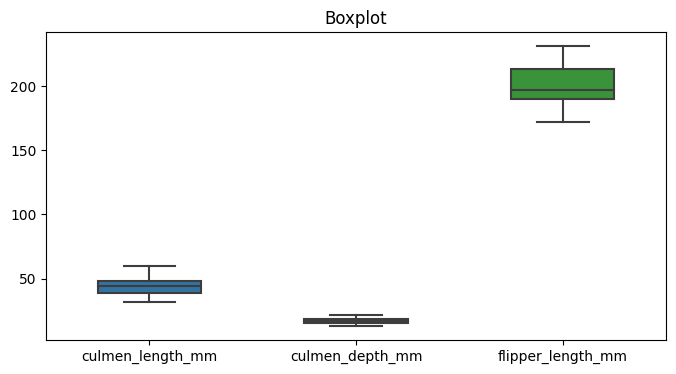

In [120]:
penguin_b = penguin_data[['culmen_length_mm',
       'culmen_depth_mm', 'flipper_length_mm']]
plt.figure(figsize=(8,4))
plt.title("Boxplot")
sns.boxplot(data=penguin_b, width=0.5, fliersize=5)

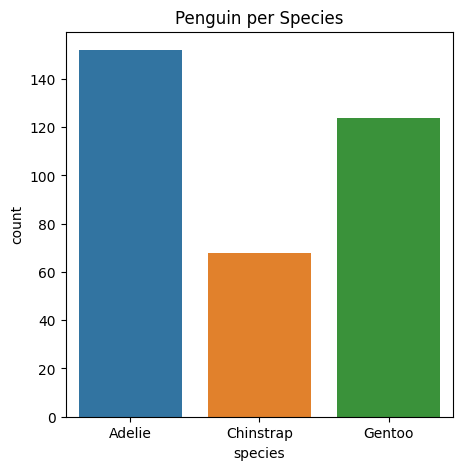

In [126]:
plt.figure(figsize=(5,5))
plt.title("Penguin per Species")
sns.countplot(x="species", data = df);

<Axes: title={'center': 'Number of penguins per Island'}, xlabel='island', ylabel='count'>

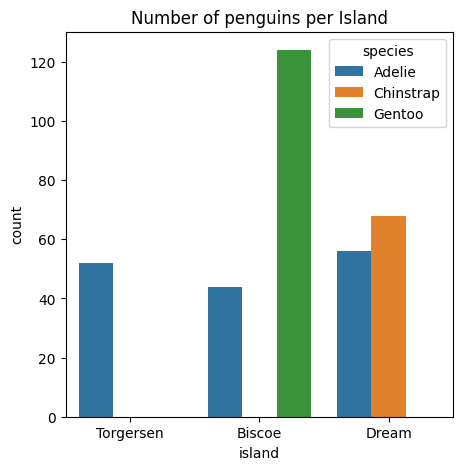

In [128]:
plt.figure(figsize=(5,5))
plt.title("Number of penguins per Island")
sns.countplot(x="island", hue="species", data=df)

<Figure size 1200x600 with 0 Axes>

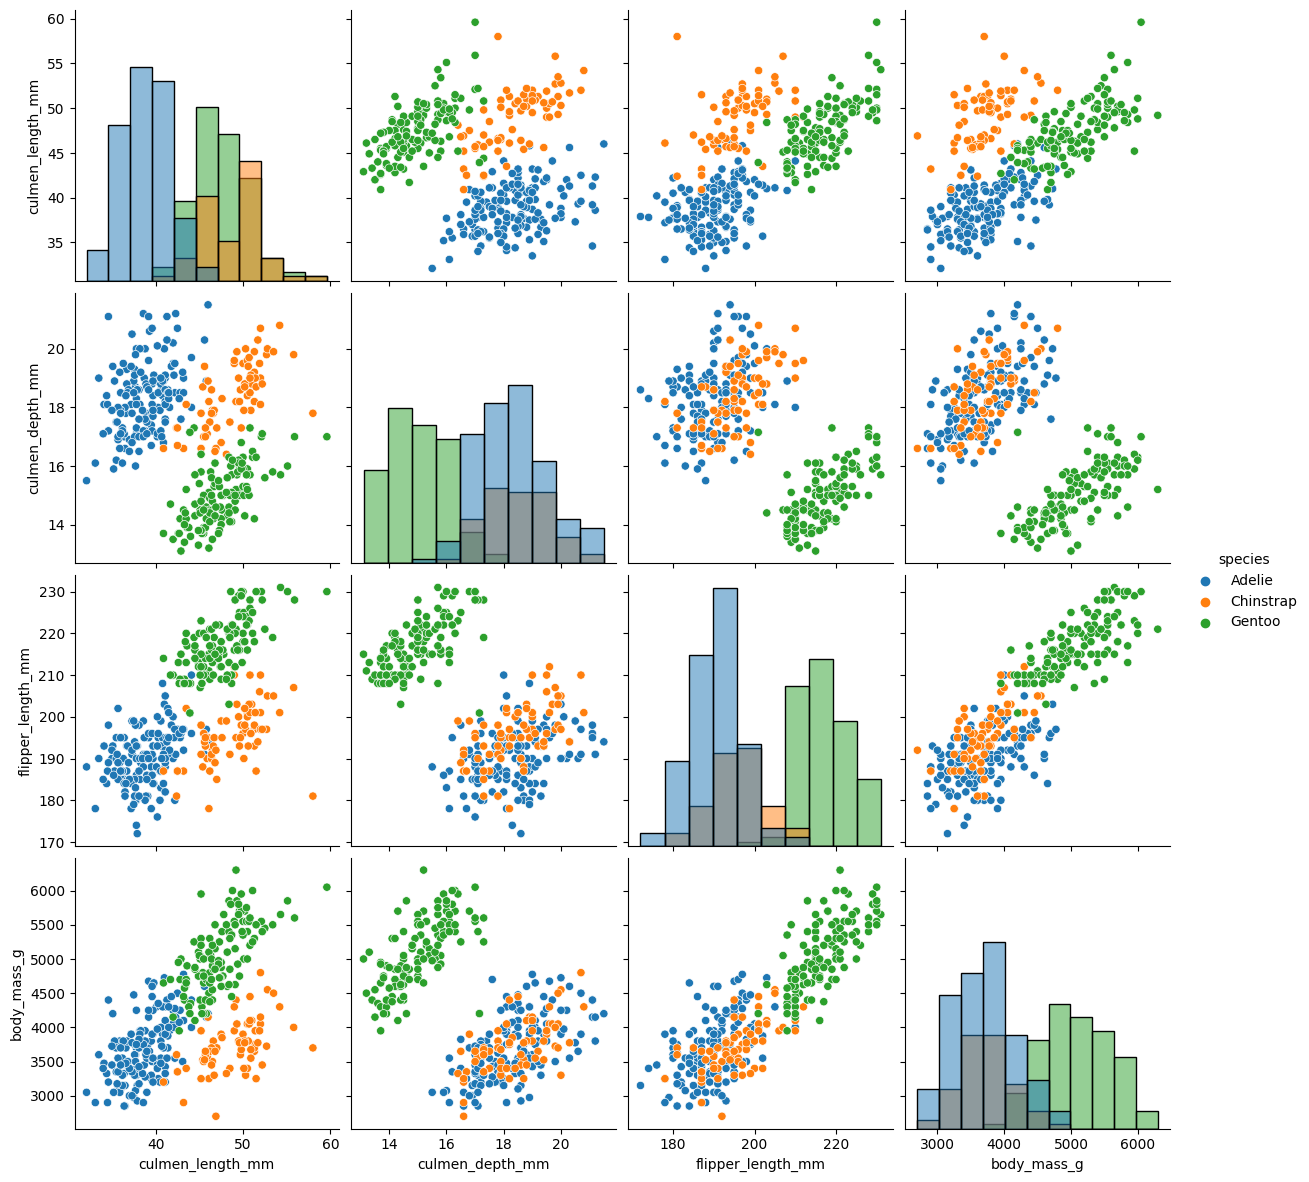

In [131]:
Vpenguin = df[['species','culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
plt.figure(figsize=(12,6))
sns.pairplot(Vpenguin, hue="species", height=3,diag_kind="hist")

In [132]:
Vpenguin.select_dtypes("number")
Vpenguin.cov()
# Observation: - The culmen length, flipper length, and body mass will vary in the same direction.
# Only the culmen depth will move in the opposite direction from the others.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.633252,-2.519457,50.082029,2590.398957
culmen_depth_mm,-2.519457,3.877069,-16.118414,-743.012250
flipper_length_mm,50.082029,-16.118414,196.578837,9767.130837
body_mass_g,2590.398957,-743.012250,9767.130837,639381.041890


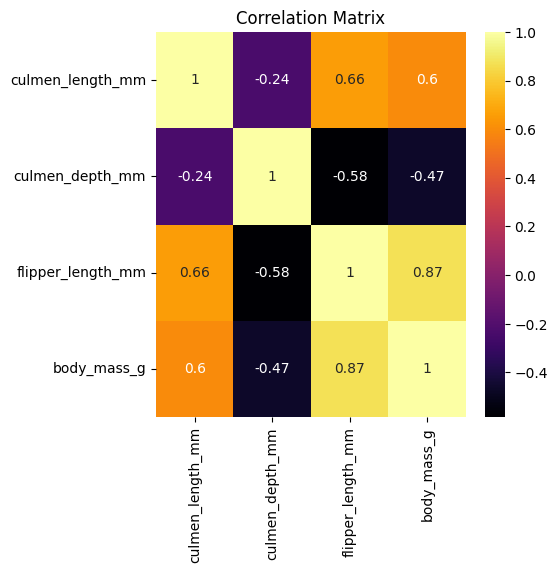

In [134]:
plt.figure(figsize=(5,5))
sns.heatmap(Vpenguin.corr(), annot=True, cmap='inferno')
plt.title("Correlation Matrix")
plt.show()
'''
Observation: There is a strong correlation between the body mass of a penguin and its flipper length. Ex: If the penguin is more big, the flipper also.
- The culmen depth will strongly decrease as the flipper length increase. '''

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [139]:
X = penguin_data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'FEMALE', 'MALE', 'Biscoe', 'Dream']]
Y = penguin_data['species']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=101)

## Support Vector Machine

In [141]:
from sklearn import svm

SVCmodel = svm.SVC()

SVCmodel.fit(Xtrain,Ytrain)

SVC_pred = SVCmodel.predict(Xtest)

print(classification_report(Ytest, SVC_pred))

print(confusion_matrix(Ytest, SVC_pred))

#accuracy score

print("The Accuracy is", accuracy_score(SVC_pred, Ytest))

              precision    recall  f1-score   support

      Adelie       0.54      0.90      0.68        41
   Chinstrap       0.00      0.00      0.00        26
      Gentoo       0.86      0.84      0.85        37

    accuracy                           0.65       104
   macro avg       0.47      0.58      0.51       104
weighted avg       0.52      0.65      0.57       104

[[37  0  4]
 [25  0  1]
 [ 6  0 31]]
The Accuracy is 0.6538461538461539


## KNeighbors Classifier

In [142]:
from sklearn.neighbors import KNeighborsClassifier

Kmodel = KNeighborsClassifier(n_neighbors=5)

Kmodel.fit(Xtrain,Ytrain)

K_pred = Kmodel.predict(Xtest)

print(classification_report(Ytest, K_pred))

print(confusion_matrix(Ytest, K_pred))

#accuracy score

print("The Accuracy is", accuracy_score(K_pred, Ytest))

              precision    recall  f1-score   support

      Adelie       0.61      0.88      0.72        41
   Chinstrap       0.75      0.23      0.35        26
      Gentoo       0.89      0.89      0.89        37

    accuracy                           0.72       104
   macro avg       0.75      0.67      0.65       104
weighted avg       0.75      0.72      0.69       104

[[36  2  3]
 [19  6  1]
 [ 4  0 33]]
The Accuracy is 0.7211538461538461


## Decision Tree Classifier

In [143]:
from sklearn.tree import DecisionTreeClassifier

DTmodel = DecisionTreeClassifier(random_state=18)

DTmodel.fit(Xtrain,Ytrain)

m_pred = DTmodel.predict(Xtest)

print(classification_report(Ytest, m_pred))

print(confusion_matrix(Ytest, m_pred))

#accuracy score

print("The Accuracy is", accuracy_score(m_pred, Ytest))

              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        41
   Chinstrap       1.00      0.96      0.98        26
      Gentoo       1.00      0.95      0.97        37

    accuracy                           0.97       104
   macro avg       0.98      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104

[[41  0  0]
 [ 1 25  0]
 [ 2  0 35]]
The Accuracy is 0.9711538461538461
